In [16]:
import pickle
import numpy as np
import scipy.sparse as sp
import pandas as pd

In [17]:
# Load the pickle file
with open('adj_mx.pkl', 'rb') as f:
    adj_mat = pickle.load(f)
    
# adj_mat contains three objects: sensor_ids, sensor_id_to_ind, adj_mx

In [18]:
csv_file = 'graph_indices.txt'
ind = pd.read_csv(csv_file)
print(ind)

Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]
Index: []

[0 rows x 123 columns]


In [19]:
adj_mx0 = adj_mat[0]
print(adj_mx0)
print(len(adj_mx0))

['120022', '120023', '120051', '120081', '120111', '120112', '120113', '134021', '134031', '134041', '134051', '134081', '134111', '134112', '140031', '140041', '140051', '140111', '140121', '159051', '159052', '159082', '159111', '159112', '159651', '159652', '159711', '159712', '159713', '405021', '405022', '405031', '405032', '405041', '405051', '405071', '405081', '405082', '405091', '405101', '405111', '405641', '405651', '405661', '405681', '405711', '405712', '405721', '406011', '406021', '406022', '406081', '406082', '406091', '406101', '406121', '701021', '701051', '701052', '701111', '701112', '701113', '701121', '702011', '702031', '702041', '702051', '702052', '702111', '702112', '702121', '703021', '703022', '703031', '703051', '703052', '703081', '703082', '703091', '703111', '703112', '709011', '709021', '709081', '709082', '709083', '709101', '709111', '709112', '709121', '709651', '709652', '709661', '709711', '709712', '711021', '711022', '710051', '710052', '710053',

In [20]:
adj_mx1 = adj_mat[1]
print(adj_mx1)

{'120022': 0, '120023': 1, '120051': 2, '120081': 3, '120111': 4, '120112': 5, '120113': 6, '134021': 7, '134031': 8, '134041': 9, '134051': 10, '134081': 11, '134111': 12, '134112': 13, '140031': 14, '140041': 15, '140051': 16, '140111': 17, '140121': 18, '159051': 19, '159052': 20, '159082': 21, '159111': 22, '159112': 23, '159651': 24, '159652': 25, '159711': 26, '159712': 27, '159713': 28, '405021': 29, '405022': 30, '405031': 31, '405032': 32, '405041': 33, '405051': 34, '405071': 35, '405081': 36, '405082': 37, '405091': 38, '405101': 39, '405111': 40, '405641': 41, '405651': 42, '405661': 43, '405681': 44, '405711': 45, '405712': 46, '405721': 47, '406011': 48, '406021': 49, '406022': 50, '406081': 51, '406082': 52, '406091': 53, '406101': 54, '406121': 55, '701021': 56, '701051': 57, '701052': 58, '701111': 59, '701112': 60, '701113': 61, '701121': 62, '702011': 63, '702031': 64, '702041': 65, '702051': 66, '702052': 67, '702111': 68, '702112': 69, '702121': 70, '703021': 71, '

In [21]:
# find duplicates in the list adj_mx0:

# create a list of duplicates
duplicates = []
for i in range(len(adj_mx0)):
    for j in range(i+1, len(adj_mx0)):
        if adj_mx0[i] == adj_mx0[j]:
            duplicates.append(adj_mx0[i])
print(duplicates)

[]


In [22]:
adj_mx1 = adj_mat[1]
# extract the keys from adj_mx1 and save in an array: 
adj_mx1_keys = []
for key in adj_mx1.keys():
    adj_mx1_keys.append(key)
print(adj_mx1_keys) # this is the list of keys
print(len(adj_mx1_keys)) # this is the number of keys

['120022', '120023', '120051', '120081', '120111', '120112', '120113', '134021', '134031', '134041', '134051', '134081', '134111', '134112', '140031', '140041', '140051', '140111', '140121', '159051', '159052', '159082', '159111', '159112', '159651', '159652', '159711', '159712', '159713', '405021', '405022', '405031', '405032', '405041', '405051', '405071', '405081', '405082', '405091', '405101', '405111', '405641', '405651', '405661', '405681', '405711', '405712', '405721', '406011', '406021', '406022', '406081', '406082', '406091', '406101', '406121', '701021', '701051', '701052', '701111', '701112', '701113', '701121', '702011', '702031', '702041', '702051', '702052', '702111', '702112', '702121', '703021', '703022', '703031', '703051', '703052', '703081', '703082', '703091', '703111', '703112', '709011', '709021', '709081', '709082', '709083', '709101', '709111', '709112', '709121', '709651', '709652', '709661', '709711', '709712', '711021', '711022', '710051', '710052', '710053',

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122]
123


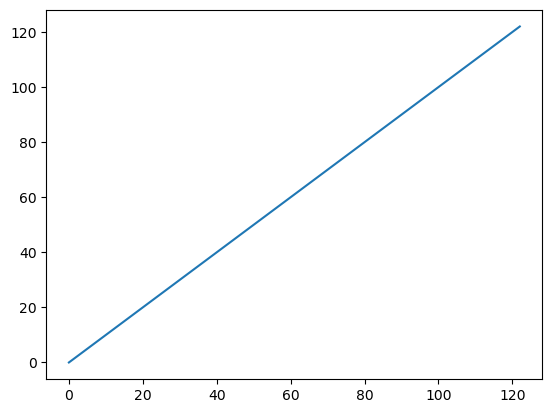

In [23]:
# extract the values from adj_mx1 and save in an array:
adj_mx1_values = []
for value in adj_mx1.values():
    adj_mx1_values.append(value)
print(adj_mx1_values) # this is the list of values
print(len(adj_mx1_values)) # this is the length of the list of values
#plot the values
import matplotlib.pyplot as plt
plt.plot(adj_mx1_values)
plt.show()

In [24]:
adj_mx=adj_mat[2]
print(adj_mx.shape)

(123, 123)


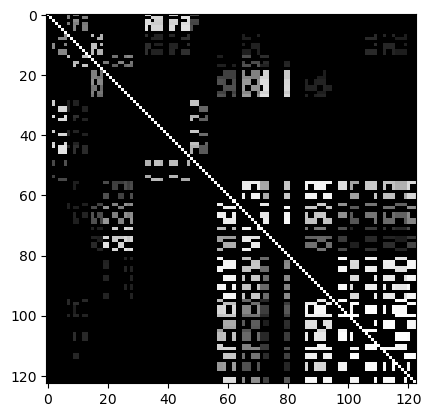

In [25]:
#plot the adjacency matrix as a grayscale image:
import matplotlib.pyplot as plt
# plt.figure(figsize=(5,5))
plt.imshow(adj_mx, cmap='Greys_r')
plt.show()

In [26]:
# Construct an array with sum of each row:
rowsum = np.array(adj_mx.sum(1))
# Is there any rowsum that is zero?
print(np.where(rowsum==0))

(array([], dtype=int64),)


Perform the test of the random_walk procedure:

In [27]:
adj_mx = sp.coo_matrix(adj_mx)
d = np.array(adj_mx.sum(1))
d_inv = np.power(d, -1).flatten()
d_inv[np.isinf(d_inv)] = 0.

In [28]:
d_mat_inv = sp.diags(d_inv)

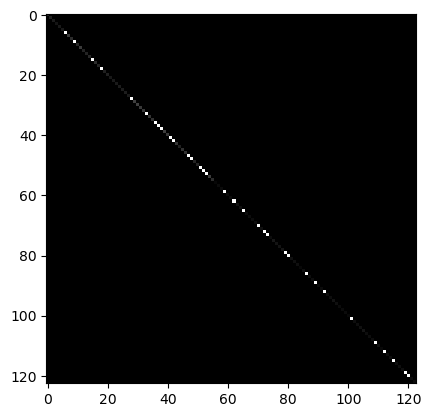

In [29]:
# plot the matrix d_mat_inv as grayscale image:
import matplotlib.pyplot as plt
plt.imshow(d_mat_inv.todense(), cmap='gray')
plt.show()